After 1000 iterations, the error of my prediction is = 11.631450024036447


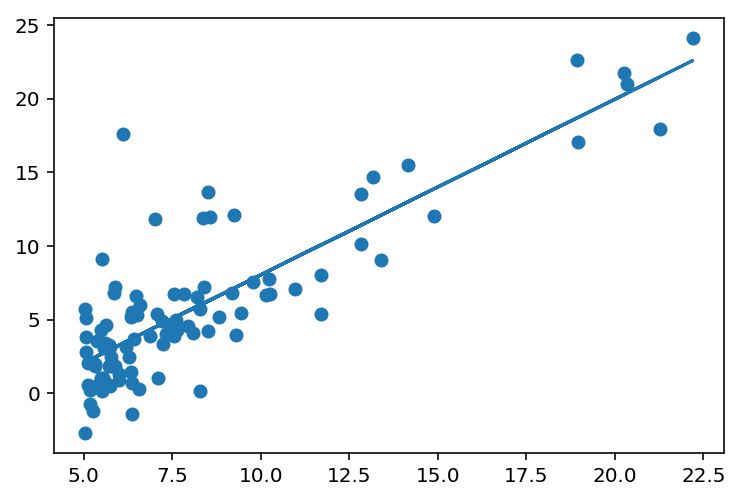

In [85]:
#Load the images directly to notebook
%matplotlib inline 
#Image with High Quality
%config InlineBackend.figure_format = 'retina' 

from sklearn import linear_model
import matplotlib.pyplot as plt

def compute_error_for_line_given_dataframe(b, m, dataframe):
    totalError = 0
    for i in range(0, len(dataframe)):
        x = dataframe[i, 0]
        y = dataframe[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(dataframe))

def step_gradient(b_current, m_current, dataframe, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(dataframe))
    for i in range(0, len(dataframe)):
        x = dataframe[i, 0]
        y = dataframe[i, 1]
        m_gradient += - x * (y - (m_current * x + b_current))
        b_gradient += - (y - (m_current * x + b_current))

    new_b = b_current - (learningRate * (2 / N * b_gradient))
    new_m = m_current - (learningRate * (2 / N * m_gradient))
    return [new_b, new_m]

def gradient_descent_runner(dataframe, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(dataframe), learning_rate)
    return [b, m]

def reading_datas(dataframe):
    for i in range(0, len(dataframe)):
        x = dataframe[:, 0]
        y = dataframe[:, 1]
    return [x, y]

def run():
    dataframe = genfromtxt('challenge_dataset.txt',delimiter=',')
    learning_rate = 0.0001
    initial_b = 0
    initial_m = 0 
    num_iterations = 1000
    [b, m] = gradient_descent_runner(dataframe, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations, the error of my prediction is = {1}".format(num_iterations, compute_error_for_line_given_points(b, m, dataframe)))
    [x, y] = reading_datas(dataframe)
    body_reg = linear_model.LinearRegression()
    body_reg.fit(x.reshape(len(x),1), y)
    #PLOT
    plt.scatter(x, y)
    plt.plot(x.reshape(len(x),1), body_reg.predict(x.reshape(len(x),1)))
    plt.show()

if __name__ == '__main__':
    run()
